# Buildings in Central Asia

## 1. Bishkek

<IPython.core.display.Javascript object>


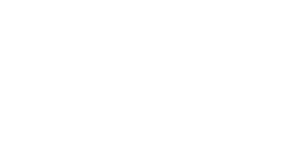

In [19]:
%matplotlib notebook
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Load the data from Excel
data = pd.read_excel("C:/Users/UCA/Documents/summers 2023/IWPR internship/building/Final Project/Bishkek_data.xlsx")

# Create a figure and a 3D subplot
fig = plt.figure()
ax1 = fig.add_subplot(111, projection='3d')

# Set positions and dimensions for bars
xpos = np.arange(len(data))
ypos = data['No. of Buildings']
zpos = np.zeros(len(data))
dx = np.full(len(data), 0.8)  # Length of the bars (adjust this value to change the distance)
dy = np.full(len(data), 5000)  # Width of the bars
dz = data['No. of Floors']

# Define a color map and normalize the number of floors to map to colors
light_blue = (0, 93, 138)   # (R, G, B) for light blue
color = (light_blue[0] / 255, light_blue[1] / 255, light_blue[2] / 255)  # Normalize RGB values to be in the range [0, 1]


# Plot the 3D bar graph with varying intensity of blue along the height of each bar
for i, (x, y, z, h) in enumerate(zip(xpos, ypos, zpos, dz)):
    intensity = np.linspace(0.2, 1, h)  # Adjust intensity along the height of the bar
    for j in range(h):
        if j >= 5:  # Start using blue color after the 5th floor
            blue_intensity = intensity[j]
        else:
            blue_intensity = 0  # Keep the bottom part white
        bar_color = (
            (1 - blue_intensity) * color[0], 
            (1 - blue_intensity) * color[1], 
            (1 - blue_intensity) * color[2], 
            1.0  # Alpha value (fully opaque)
        )
        ax1.bar3d(x, y, z+j, dx[i], dy[i], 1, color=bar_color)

        
# Add a title to the figure
fig.suptitle('Bishkek')
        
        
# Set labels for the axes
ax1.set_xlabel('Bishkek')
ax1.set_ylabel('No. of Buildings')
ax1.set_zlabel('No. of Floors')

# Show the plot
plt.show()


# Dashboard

<IPython.core.display.Javascript object>


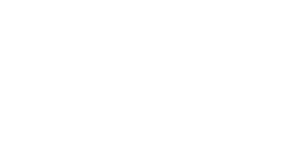

In [20]:
%matplotlib notebook
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.widgets import Slider, Button
import numpy as np
import pandas as pd

# Load the data from Excel
data = pd.read_excel("C:/Users/UCA/Documents/summers 2023/IWPR internship/building/Final Project/Bishkek_data.xlsx")

# Create a figure and a 3D subplot
fig = plt.figure()
ax1 = fig.add_subplot(111, projection='3d')

# Set positions and dimensions for bars
xpos = np.arange(len(data))
ypos = data['No. of Buildings']
zpos = np.zeros(len(data))
dx = np.full(len(data), 0.8)  # Length of the bars (adjust this value to change the distance)
dy = np.full(len(data), 5000)  # Width of the bars
dz = data['No. of Floors']

# Define a color map and normalize the number of floors to map to colors
light_blue = (0, 93, 138)   # (R, G, B) for light blue
color = (light_blue[0] / 255, light_blue[1] / 255, light_blue[2] / 255)  # Normalize RGB values to be in the range [0, 1]

# Plot the 3D bar graph with varying intensity of blue along the height of each bar
bars = []
for i, (x, y, z, h) in enumerate(zip(xpos, ypos, zpos, dz)):
    intensity = np.linspace(0.2, 1, h)  # Adjust intensity along the height of the bar
    for j in range(h):
        if j >= 5:  # Start using blue color after the 5th floor
            blue_intensity = intensity[j]
        else:
            blue_intensity = 0  # Keep the bottom part white
        bar_color = (
            (1 - blue_intensity) * color[0], 
            (1 - blue_intensity) * color[1], 
            (1 - blue_intensity) * color[2], 
            1.0  # Alpha value (fully opaque)
        )
        bar = ax1.bar3d(x, y, z+j, dx[i], dy[i], 1, color=bar_color)
        bars.append(bar)

# Add a title to the figure
fig.suptitle('Bishkek')

# Set labels for the axes
ax1.set_xlabel('Bishkek')
ax1.set_ylabel('No. of Buildings')
ax1.set_zlabel('No. of Floors')

# Add sliders for interactive control
axcolor = 'lightgoldenrodyellow'
ax_xpos = plt.axes([0.2, 0.01, 0.65, 0.03], facecolor=axcolor)
ax_ypos = plt.axes([0.2, 0.06, 0.65, 0.03], facecolor=axcolor)
ax_dz = plt.axes([0.2, 0.11, 0.65, 0.03], facecolor=axcolor)

s_xpos = Slider(ax_xpos, 'X Position', 0, len(data)-1, valinit=0, valstep=1)
s_ypos = Slider(ax_ypos, 'Y Position', min(ypos), max(ypos), valinit=min(ypos), valstep=1)
s_dz = Slider(ax_dz, 'No. of Floors', 0, max(dz), valinit=min(dz), valstep=1)

def update(val):
    xpos_val = int(s_xpos.val)
    ypos_val = int(s_ypos.val)
    dz_val = int(s_dz.val)
    
    # Update the bars positions and heights
    for i, (x, y, z, h) in enumerate(zip(xpos, ypos, zpos, dz)):
        if i == xpos_val:
            bars[i].remove()
            bars[i] = ax1.bar3d(x, y, z, dx[i], dy[i], dz_val, color=bars[i].get_facecolor())
        else:
            bars[i].remove()
            bars[i] = ax1.bar3d(x, y, z, dx[i], dy[i], h, color=bars[i].get_facecolor())
    
    fig.canvas.draw_idle()

s_xpos.on_changed(update)
s_ypos.on_changed(update)
s_dz.on_changed(update)

# Add a reset button
resetax = plt.axes([0.8, 0.95, 0.1, 0.04])
button_reset = Button(resetax, 'Reset', color=axcolor, hovercolor='0.975')

def reset(event):
    s_xpos.reset()
    s_ypos.reset()
    s_dz.reset()

button_reset.on_clicked(reset)

# Show the plot
plt.show()


<IPython.core.display.Javascript object>


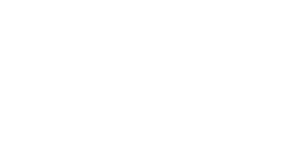

In [21]:
%matplotlib notebook
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Load the data from Excel
data = pd.read_excel("C:/Users/UCA/Documents/summers 2023/IWPR internship/building/Final Project/Bishkek_data.xlsx")

# Create a figure and a 3D subplot
fig = plt.figure()
ax1 = fig.add_subplot(111, projection='3d')

# Set positions and dimensions for bars
xpos = np.arange(len(data))
ypos = data['No. of Buildings']
zpos = np.zeros(len(data))
dx = np.full(len(data), 0.8)  # Length of the bars (adjust this value to change the distance)
dy = np.full(len(data), 5000)  # Width of the bars
dz = data['No. of Floors']

# Define a color map and normalize the number of floors to map to colors
light_blue = (0, 93, 138)   # (R, G, B) for light blue
color = (light_blue[0] / 255, light_blue[1] / 255, light_blue[2] / 255)  # Normalize RGB values to be in the range [0, 1]


# Plot the 3D bar graph with varying intensity of blue along the height of each bar
for i, (x, y, z, h) in enumerate(zip(xpos, ypos, zpos, dz)):
    intensity = np.linspace(0.2, 1, h)  # Adjust intensity along the height of the bar
    for j in range(h):
        if j >= 5:  # Start using blue color after the 5th floor
            blue_intensity = intensity[j]
        else:
            blue_intensity = 0  # Keep the bottom part white
        bar_color = (
            (1 - blue_intensity) * color[0], 
            (1 - blue_intensity) * color[1], 
            (1 - blue_intensity) * color[2], 
            1.0  # Alpha value (fully opaque)
        )
        ax1.bar3d(x, y, z+j, dx[i], dy[i], 1, color=bar_color)

        
# Add a title to the figure
fig.suptitle('Бишкек')

        
        
# Set labels for the axes
ax1.set_xlabel('Бишкек')
ax1.set_ylabel('количество зданий')
ax1.set_zlabel('количество этажей')

# Show the plot
plt.show()


<IPython.core.display.Javascript object>


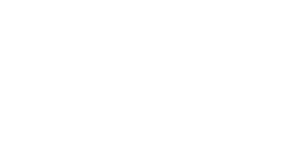

In [22]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D

# Load the data from Excel
data = pd.read_excel("C:/Users/UCA/Documents/summers 2023/IWPR internship/building/Final Project/Bishkek_data.xlsx")

# Define a function to plot the 3D bar graph with varying intensity of blue along the height of each bar
def plot_3d_bar_graph(ax, xpos, ypos, zpos, dx, dy, dz, xlabel, ylabel, zlabel):
    light_blue = (0, 93, 138)   # (R, G, B) for light blue
    color = (light_blue[0] / 255, light_blue[1] / 255, light_blue[2] / 255)  # Normalize RGB values to be in the range [0, 1]

    for i, (x, y, z, h) in enumerate(zip(xpos, ypos, zpos, dz)):
        intensity = np.linspace(0.2, 1, h)  # Adjust intensity along the height of the bar
        for j in range(h):
            if j >= 5:  # Start using blue color after the 5th floor
                blue_intensity = intensity[j]
            else:
                blue_intensity = 0  # Keep the bottom part white
            bar_color = (
                (1 - blue_intensity) * color[0], 
                (1 - blue_intensity) * color[1], 
                (1 - blue_intensity) * color[2], 
                1.0  # Alpha value (fully opaque)
            )
            ax.bar3d(x, y, z+j, dx[i], dy[i], 1, color=bar_color)

    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_zlabel(zlabel)

# Create a figure and a 1x2 grid of subplots
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(10, 6), subplot_kw={'projection': '3d'})

# Set positions and dimensions for bars for the first graph (ax1)
xpos1 = np.arange(len(data))
ypos1 = data['No. of Buildings']
zpos1 = np.zeros(len(data))
dx1 = np.full(len(data), 0.8)
dy1 = np.full(len(data), 5000)
dz1 = data['No. of Floors']

# Plot the 3D bar graph for the first subplot with specific labels
plot_3d_bar_graph(ax1, xpos1, ypos1, zpos1, dx1, dy1, dz1, 'Bishkek', 'No. of Buildings', 'No. of Floors')

# Set positions and dimensions for bars for the second graph (ax2)
xpos2 = np.arange(len(data))
ypos2 = data['No. of Buildings']
zpos2 = np.zeros(len(data))
dx2 = np.full(len(data), 0.8)
dy2 = np.full(len(data), 5000)
dz2 = data['No. of Floors']

# Plot the 3D bar graph for the second subplot with specific labels
plot_3d_bar_graph(ax2, xpos2, ypos2, zpos2, dx2, dy2, dz2, 'Бишкек', 'количество зданий', 'количество этажей')

# Set title for each subplot
ax1.set_title('Bishkek')
ax2.set_title('Бишкек')

# Adjust subplot spacing
plt.subplots_adjust(wspace=0.5)

# Show the plot
plt.show()


## 2. Astana

<IPython.core.display.Javascript object>


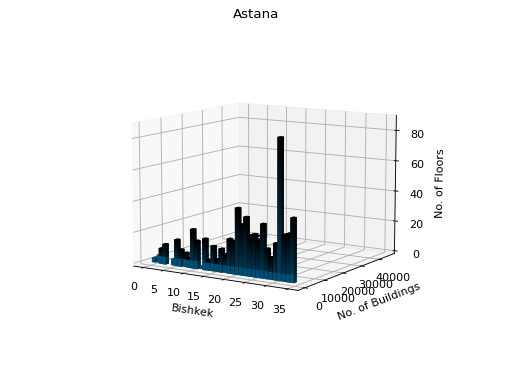

In [23]:
%matplotlib notebook
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Load the data from Excel
data = pd.read_excel("C:/Users/UCA/Documents/summers 2023/IWPR internship/building/Final Project/Astana_data.xlsx")

# Create a figure and a 3D subplot
fig = plt.figure()
ax1 = fig.add_subplot(111, projection='3d')

# Set positions and dimensions for bars
xpos = np.arange(len(data))
ypos = data['No. of Buildings']
zpos = np.zeros(len(data))
dx = np.full(len(data), 0.8)  # Length of the bars (adjust this value to change the distance)
dy = np.full(len(data), 1500)  # Width of the bars
dz = data['No. of Floors']

# Define a color map and normalize the number of floors to map to colors
light_blue = (0, 93, 138)   # (R, G, B) for light blue
color = (light_blue[0] / 255, light_blue[1] / 255, light_blue[2] / 255)  # Normalize RGB values to be in the range [0, 1]


# Plot the 3D bar graph with varying intensity of blue along the height of each bar
for i, (x, y, z, h) in enumerate(zip(xpos, ypos, zpos, dz)):
    intensity = np.linspace(0.2, 1, h)  # Adjust intensity along the height of the bar
    for j in range(h):
        if j >= 5:  # Start using blue color after the 5th floor
            blue_intensity = intensity[j]
        else:
            blue_intensity = 0  # Keep the bottom part white
        bar_color = (
            (1 - blue_intensity) * color[0], 
            (1 - blue_intensity) * color[1], 
            (1 - blue_intensity) * color[2], 
            1.0  # Alpha value (fully opaque)
        )
        ax1.bar3d(x, y, z+j, dx[i], dy[i], 1, color=bar_color)

        
# Add a title to the figure
fig.suptitle('Astana')

# Set labels for the axes
ax1.set_xlabel('Bishkek')
ax1.set_ylabel('No. of Buildings')
ax1.set_zlabel('No. of Floors')

# Show the plot
plt.show()


# Dasboard 1

In [6]:
import pandas as pd
import plotly.express as px

# Load the data from Excel
data = pd.read_excel("C:/Users/UCA/Documents/summers 2023/IWPR internship/building/Final Project/Bishkek_data.xlsx")

# Create a 3D bar chart-like visualization using Plotly Express
fig = px.scatter_3d(data,
                    x=data.index,
                    y='No. of Buildings',
                    z='No. of Floors',
                    opacity=0.7,  # Set opacity for bars
                    color_continuous_scale='Blues'  # Use the 'Blues' colormap
                    )

# Update the marker properties to create bars
fig.update_traces(mode='markers',
                  marker=dict(size=10, color=data['No. of Floors'], colorscale='Blues', opacity=0.7),
                  selector=dict(type='scatter3d'))

# Update the layout of the figure
fig.update_layout(scene=dict(
                          xaxis_title='Bishkek',
                          yaxis_title='No. of Buildings',
                          zaxis_title='No. of Floors'),
                  scene_camera=dict(eye=dict(x=1.4, y=-1.4, z=0.5)),  # Adjust camera position for better view
                  title='Bishkek 3D Building Visualization',  # Set title for the figure
)

# Show the interactive 3D bar chart dashboard
fig.show(renderer="browser", port=8050)


# Dashboard 2

<IPython.core.display.Javascript object>


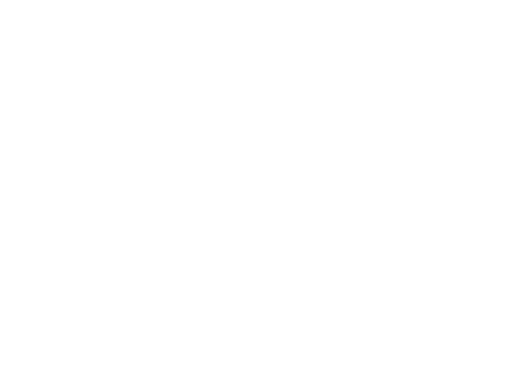

In [7]:
%matplotlib notebook
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Load the data from Excel
data = pd.read_excel("C:/Users/UCA/Documents/summers 2023/IWPR internship/building/Final Project/Astana_data.xlsx")

# Create a figure and a 3D subplot
fig = plt.figure()
ax1 = fig.add_subplot(111, projection='3d')

# Set positions and dimensions for bars
xpos = np.arange(len(data))
ypos = data['No. of Buildings']
zpos = np.zeros(len(data))
dx = np.full(len(data), 0.8)  # Length of the bars (adjust this value to change the distance)
dy = np.full(len(data), 1500)  # Width of the bars
dz = data['No. of Floors']

# Define a color map and normalize the number of floors to map to colors
light_blue = (0, 93, 138)   # (R, G, B) for light blue
color = (light_blue[0] / 255, light_blue[1] / 255, light_blue[2] / 255)  # Normalize RGB values to be in the range [0, 1]


# Plot the 3D bar graph with varying intensity of blue along the height of each bar
for i, (x, y, z, h) in enumerate(zip(xpos, ypos, zpos, dz)):
    intensity = np.linspace(0.2, 1, h)  # Adjust intensity along the height of the bar
    for j in range(h):
        if j >= 5:  # Start using blue color after the 5th floor
            blue_intensity = intensity[j]
        else:
            blue_intensity = 0  # Keep the bottom part white
        bar_color = (
            (1 - blue_intensity) * color[0], 
            (1 - blue_intensity) * color[1], 
            (1 - blue_intensity) * color[2], 
            1.0  # Alpha value (fully opaque)
        )
        ax1.bar3d(x, y, z+j, dx[i], dy[i], 1, color=bar_color)

        
# Add a title to the figure
fig.suptitle('Астана')

# Set labels for the axes
ax1.set_xlabel('Астана')
ax1.set_ylabel('количество зданий')
ax1.set_zlabel('количество этажей')

# Show the plot
plt.show()


<IPython.core.display.Javascript object>


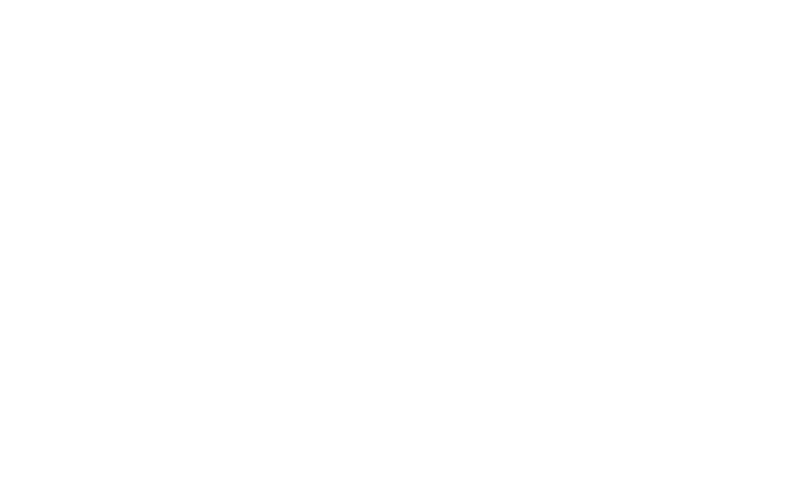

In [8]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D

# Load the data from Excel
data = pd.read_excel("C:/Users/UCA/Documents/summers 2023/IWPR internship/building/Final Project/Astana_data.xlsx")

# Define a function to plot the 3D bar graph with varying intensity of blue along the height of each bar
def plot_3d_bar_graph(ax, xpos, ypos, zpos, dx, dy, dz, xlabel, ylabel, zlabel):
    light_blue = (0, 93, 138)   # (R, G, B) for light blue
    color = (light_blue[0] / 255, light_blue[1] / 255, light_blue[2] / 255)  # Normalize RGB values to be in the range [0, 1]

    for i, (x, y, z, h) in enumerate(zip(xpos, ypos, zpos, dz)):
        intensity = np.linspace(0.2, 1, h)  # Adjust intensity along the height of the bar
        for j in range(h):
            if j >= 5:  # Start using blue color after the 5th floor
                blue_intensity = intensity[j]
            else:
                blue_intensity = 0  # Keep the bottom part white
            bar_color = (
                (1 - blue_intensity) * color[0], 
                (1 - blue_intensity) * color[1], 
                (1 - blue_intensity) * color[2], 
                1.0  # Alpha value (fully opaque)
            )
            ax.bar3d(x, y, z+j, dx[i], dy[i], 1, color=bar_color)

    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_zlabel(zlabel)

# Create a figure and a 1x2 grid of subplots
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(10, 6), subplot_kw={'projection': '3d'})

# Set positions and dimensions for bars for the first graph (ax1)
xpos1 = np.arange(len(data))
ypos1 = data['No. of Buildings']
zpos1 = np.zeros(len(data))
dx1 = np.full(len(data), 0.8)
dy1 = np.full(len(data), 1500)
dz1 = data['No. of Floors']

# Plot the 3D bar graph for the first subplot with specific labels
plot_3d_bar_graph(ax1, xpos1, ypos1, zpos1, dx1, dy1, dz1, 'Astana', 'No. of Buildings', 'No. of Floors')

# Set positions and dimensions for bars for the second graph (ax2)
xpos2 = np.arange(len(data))
ypos2 = data['No. of Buildings']
zpos2 = np.zeros(len(data))
dx2 = np.full(len(data), 0.8)
dy2 = np.full(len(data), 1500)
dz2 = data['No. of Floors']

# Plot the 3D bar graph for the second subplot with specific labels
plot_3d_bar_graph(ax2, xpos2, ypos2, zpos2, dx2, dy2, dz2, 'Астана', 'количество зданий', 'количество этажей')

# Set title for each subplot
ax1.set_title('Astana')
ax2.set_title('Астана')

# Adjust subplot spacing
plt.subplots_adjust(wspace=0.5)

# Show the plot
plt.show()


## 3. Dushanbe

<IPython.core.display.Javascript object>


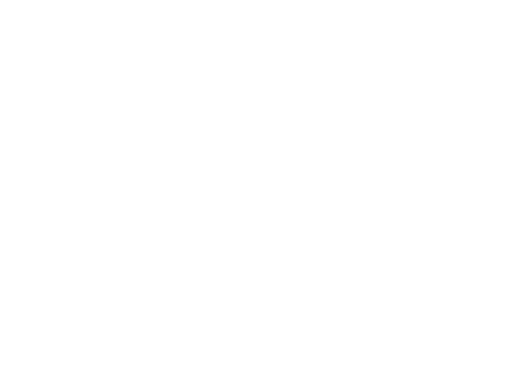

In [9]:
%matplotlib notebook
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Load the data from Excel
data = pd.read_excel("C:/Users/UCA/Documents/summers 2023/IWPR internship/building/Final Project/Dushanbe_data.xlsx")

# Create a figure and a 3D subplot
fig = plt.figure()
ax1 = fig.add_subplot(111, projection='3d')

# Set positions and dimensions for bars
xpos = np.arange(len(data))
ypos = data['No. of Buildings']
zpos = np.zeros(len(data))
dx = np.full(len(data), 0.8)  # Length of the bars (adjust this value to change the distance)
dy = np.full(len(data), 1500)  # Width of the bars
dz = data['No. of Floors']

# Define a color map and normalize the number of floors to map to colors
light_blue = (0, 93, 138)   # (R, G, B) for light blue
color = (light_blue[0] / 255, light_blue[1] / 255, light_blue[2] / 255)  # Normalize RGB values to be in the range [0, 1]


# Plot the 3D bar graph with varying intensity of blue along the height of each bar
for i, (x, y, z, h) in enumerate(zip(xpos, ypos, zpos, dz)):
    intensity = np.linspace(0.2, 1, h)  # Adjust intensity along the height of the bar
    for j in range(h):
        if j >= 5:  # Start using blue color after the 5th floor
            blue_intensity = intensity[j]
        else:
            blue_intensity = 0  # Keep the bottom part white
        bar_color = (
            (1 - blue_intensity) * color[0], 
            (1 - blue_intensity) * color[1], 
            (1 - blue_intensity) * color[2], 
            1.0  # Alpha value (fully opaque)
        )
        ax1.bar3d(x, y, z+j, dx[i], dy[i], 1, color=bar_color)

        
# Add a title to the figure
fig.suptitle('Dushanbe')

# Set labels for the axes
ax1.set_xlabel('Dushanbe')
ax1.set_ylabel('No. of Buildings')
ax1.set_zlabel('No. of Floors')

# Show the plot
plt.show()


<IPython.core.display.Javascript object>


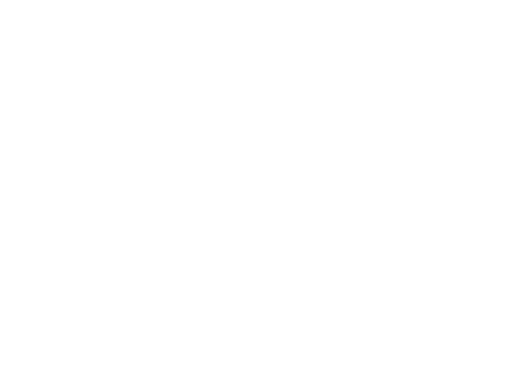

In [10]:
%matplotlib notebook
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Load the data from Excel
data = pd.read_excel("C:/Users/UCA/Documents/summers 2023/IWPR internship/building/Final Project/Dushanbe_data.xlsx")

# Create a figure and a 3D subplot
fig = plt.figure()
ax1 = fig.add_subplot(111, projection='3d')

# Set positions and dimensions for bars
xpos = np.arange(len(data))
ypos = data['No. of Buildings']
zpos = np.zeros(len(data))
dx = np.full(len(data), 0.8)  # Length of the bars (adjust this value to change the distance)
dy = np.full(len(data), 1500)  # Width of the bars
dz = data['No. of Floors']

# Define a color map and normalize the number of floors to map to colors
light_blue = (0, 93, 138)   # (R, G, B) for light blue
color = (light_blue[0] / 255, light_blue[1] / 255, light_blue[2] / 255)  # Normalize RGB values to be in the range [0, 1]


# Plot the 3D bar graph with varying intensity of blue along the height of each bar
for i, (x, y, z, h) in enumerate(zip(xpos, ypos, zpos, dz)):
    intensity = np.linspace(0.2, 1, h)  # Adjust intensity along the height of the bar
    for j in range(h):
        if j >= 5:  # Start using blue color after the 5th floor
            blue_intensity = intensity[j]
        else:
            blue_intensity = 0  # Keep the bottom part white
        bar_color = (
            (1 - blue_intensity) * color[0], 
            (1 - blue_intensity) * color[1], 
            (1 - blue_intensity) * color[2], 
            1.0  # Alpha value (fully opaque)
        )
        ax1.bar3d(x, y, z+j, dx[i], dy[i], 1, color=bar_color)

        
# Add a title to the figure
fig.suptitle('Душанбе')

# Set labels for the axes
ax1.set_xlabel('Душанбе')
ax1.set_ylabel('количество зданий')
ax1.set_zlabel('количество этажей')

# Show the plot
plt.show()


<IPython.core.display.Javascript object>


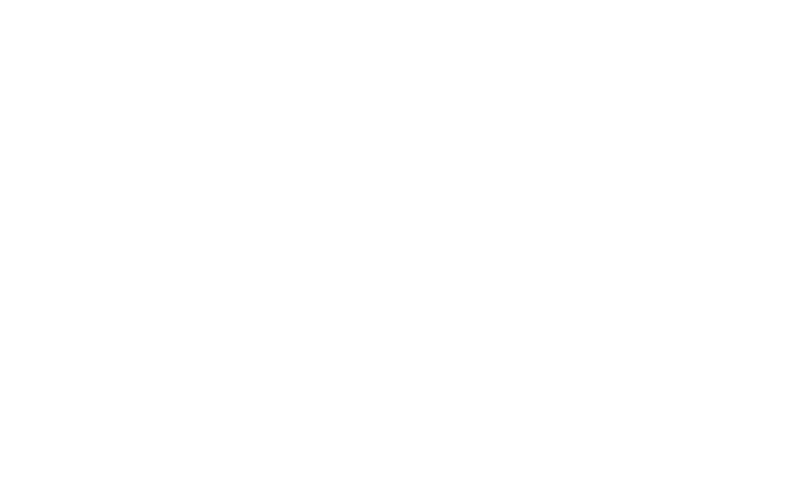

In [11]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D

# Load the data from Excel
data = pd.read_excel("C:/Users/UCA/Documents/summers 2023/IWPR internship/building/Final Project/Astana_data.xlsx")

# Define a function to plot the 3D bar graph with varying intensity of blue along the height of each bar
def plot_3d_bar_graph(ax, xpos, ypos, zpos, dx, dy, dz, xlabel, ylabel, zlabel):
    light_blue = (0, 93, 138)   # (R, G, B) for light blue
    color = (light_blue[0] / 255, light_blue[1] / 255, light_blue[2] / 255)  # Normalize RGB values to be in the range [0, 1]

    for i, (x, y, z, h) in enumerate(zip(xpos, ypos, zpos, dz)):
        intensity = np.linspace(0.2, 1, h)  # Adjust intensity along the height of the bar
        for j in range(h):
            if j >= 5:  # Start using blue color after the 5th floor
                blue_intensity = intensity[j]
            else:
                blue_intensity = 0  # Keep the bottom part white
            bar_color = (
                (1 - blue_intensity) * color[0], 
                (1 - blue_intensity) * color[1], 
                (1 - blue_intensity) * color[2], 
                1.0  # Alpha value (fully opaque)
            )
            ax.bar3d(x, y, z+j, dx[i], dy[i], 1, color=bar_color)

    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_zlabel(zlabel)

# Create a figure and a 1x2 grid of subplots
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(10, 6), subplot_kw={'projection': '3d'})

# Set positions and dimensions for bars for the first graph (ax1)
xpos1 = np.arange(len(data))
ypos1 = data['No. of Buildings']
zpos1 = np.zeros(len(data))
dx1 = np.full(len(data), 0.8)
dy1 = np.full(len(data), 1500)
dz1 = data['No. of Floors']

# Plot the 3D bar graph for the first subplot with specific labels
plot_3d_bar_graph(ax1, xpos1, ypos1, zpos1, dx1, dy1, dz1, 'Astana', 'No. of Buildings', 'No. of Floors')

# Set positions and dimensions for bars for the second graph (ax2)
xpos2 = np.arange(len(data))
ypos2 = data['No. of Buildings']
zpos2 = np.zeros(len(data))
dx2 = np.full(len(data), 0.8)
dy2 = np.full(len(data), 1500)
dz2 = data['No. of Floors']

# Plot the 3D bar graph for the second subplot with specific labels
plot_3d_bar_graph(ax2, xpos2, ypos2, zpos2, dx2, dy2, dz2, 'Душанбе', 'количество зданий', 'количество этажей')

# Set title for each subplot
ax1.set_title('Dushanbe')
ax2.set_title('Душанбе')

# Adjust subplot spacing
plt.subplots_adjust(wspace=0.5)

# Show the plot
plt.show()


## 4. Tashkent

<IPython.core.display.Javascript object>


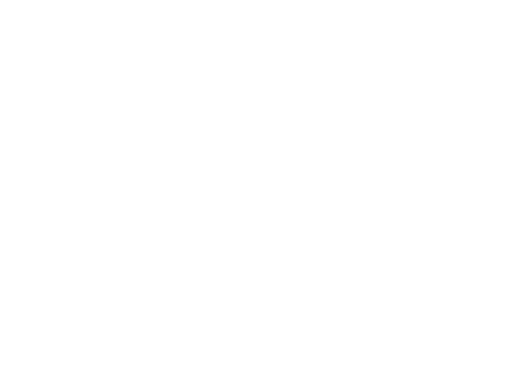

In [12]:
%matplotlib notebook
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Load the data from Excel
data = pd.read_excel("C:/Users/UCA/Documents/summers 2023/IWPR internship/building/Final Project/Tashkent_data.xlsx")

# Create a figure and a 3D subplot
fig = plt.figure()
ax1 = fig.add_subplot(111, projection='3d')

# Set positions and dimensions for bars
xpos = np.arange(len(data))
ypos = data['No. of Buildings']
zpos = np.zeros(len(data))
dx = np.full(len(data), 0.8)  # Length of the bars (adjust this value to change the distance)
dy = np.full(len(data), 5000)  # Width of the bars
dz = data['No. of Floors']

# Define a color map and normalize the number of floors to map to colors
light_blue = (0, 93, 138)   # (R, G, B) for light blue
color = (light_blue[0] / 255, light_blue[1] / 255, light_blue[2] / 255)  # Normalize RGB values to be in the range [0, 1]


# Plot the 3D bar graph with varying intensity of blue along the height of each bar
for i, (x, y, z, h) in enumerate(zip(xpos, ypos, zpos, dz)):
    intensity = np.linspace(0.2, 1, h)  # Adjust intensity along the height of the bar
    for j in range(h):
        if j >= 5:  # Start using blue color after the 5th floor
            blue_intensity = intensity[j]
        else:
            blue_intensity = 0  # Keep the bottom part white
        bar_color = (
            (1 - blue_intensity) * color[0], 
            (1 - blue_intensity) * color[1], 
            (1 - blue_intensity) * color[2], 
            1.0  # Alpha value (fully opaque)
        )
        ax1.bar3d(x, y, z+j, dx[i], dy[i], 1, color=bar_color)

        
# Add a title to the figure
fig.suptitle('Taskent')

# Set labels for the axes
ax1.set_xlabel('Taskent')
ax1.set_ylabel('No. of Buildings')
ax1.set_zlabel('No. of Floors')

# Show the plot
plt.show()


<IPython.core.display.Javascript object>


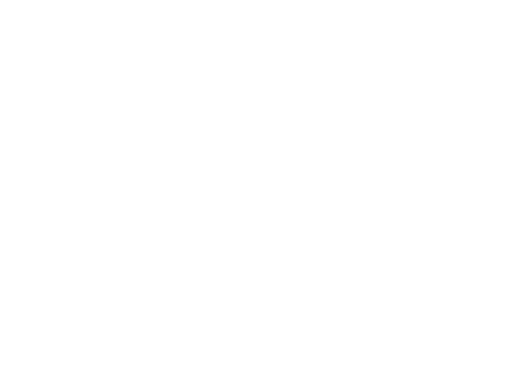

In [13]:
%matplotlib notebook
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Load the data from Excel
data = pd.read_excel("C:/Users/UCA/Documents/summers 2023/IWPR internship/building/Final Project/Tashkent_data.xlsx")

# Create a figure and a 3D subplot
fig = plt.figure()
ax1 = fig.add_subplot(111, projection='3d')

# Set positions and dimensions for bars
xpos = np.arange(len(data))
ypos = data['No. of Buildings']
zpos = np.zeros(len(data))
dx = np.full(len(data), 0.8)  # Length of the bars (adjust this value to change the distance)
dy = np.full(len(data), 5000)  # Width of the bars
dz = data['No. of Floors']

# Define a color map and normalize the number of floors to map to colors
light_blue = (0, 93, 138)   # (R, G, B) for light blue
color = (light_blue[0] / 255, light_blue[1] / 255, light_blue[2] / 255)  # Normalize RGB values to be in the range [0, 1]


# Plot the 3D bar graph with varying intensity of blue along the height of each bar
for i, (x, y, z, h) in enumerate(zip(xpos, ypos, zpos, dz)):
    intensity = np.linspace(0.2, 1, h)  # Adjust intensity along the height of the bar
    for j in range(h):
        if j >= 5:  # Start using blue color after the 5th floor
            blue_intensity = intensity[j]
        else:
            blue_intensity = 0  # Keep the bottom part white
        bar_color = (
            (1 - blue_intensity) * color[0], 
            (1 - blue_intensity) * color[1], 
            (1 - blue_intensity) * color[2], 
            1.0  # Alpha value (fully opaque)
        )
        ax1.bar3d(x, y, z+j, dx[i], dy[i], 1, color=bar_color)

        
# Add a title to the figure
fig.suptitle('Ташкент')

# Set labels for the axes
ax1.set_xlabel('Ташкент')
ax1.set_ylabel('количество зданий')
ax1.set_zlabel('количество этажей')

# Show the plot
plt.show()


<IPython.core.display.Javascript object>


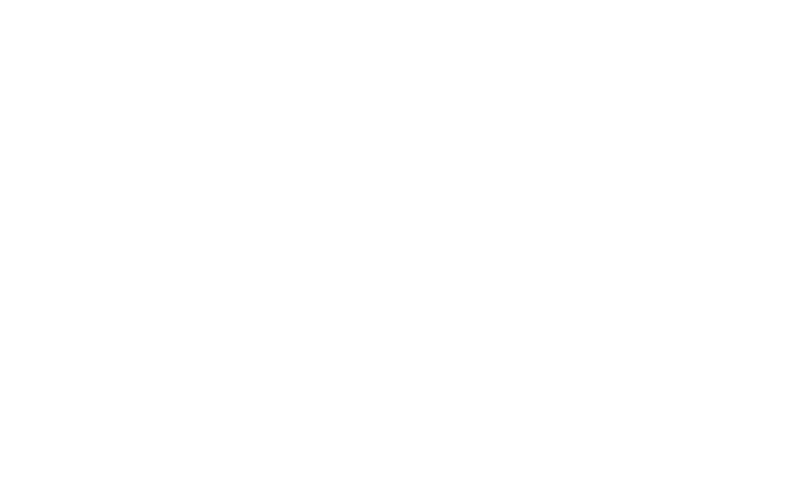

In [14]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D

# Load the data from Excel
data = pd.read_excel("C:/Users/UCA/Documents/summers 2023/IWPR internship/building/Final Project/Tashkent_data.xlsx")

# Define a function to plot the 3D bar graph with varying intensity of blue along the height of each bar
def plot_3d_bar_graph(ax, xpos, ypos, zpos, dx, dy, dz, xlabel, ylabel, zlabel):
    light_blue = (0, 93, 138)   # (R, G, B) for light blue
    color = (light_blue[0] / 255, light_blue[1] / 255, light_blue[2] / 255)  # Normalize RGB values to be in the range [0, 1]

    for i, (x, y, z, h) in enumerate(zip(xpos, ypos, zpos, dz)):
        intensity = np.linspace(0.2, 1, h)  # Adjust intensity along the height of the bar
        for j in range(h):
            if j >= 5:  # Start using blue color after the 5th floor
                blue_intensity = intensity[j]
            else:
                blue_intensity = 0  # Keep the bottom part white
            bar_color = (
                (1 - blue_intensity) * color[0], 
                (1 - blue_intensity) * color[1], 
                (1 - blue_intensity) * color[2], 
                1.0  # Alpha value (fully opaque)
            )
            ax.bar3d(x, y, z+j, dx[i], dy[i], 1, color=bar_color)

    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_zlabel(zlabel)

# Create a figure and a 1x2 grid of subplots
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(10, 6), subplot_kw={'projection': '3d'})

# Set positions and dimensions for bars for the first graph (ax1)
xpos1 = np.arange(len(data))
ypos1 = data['No. of Buildings']
zpos1 = np.zeros(len(data))
dx1 = np.full(len(data), 0.8)
dy1 = np.full(len(data), 5000)
dz1 = data['No. of Floors']

# Plot the 3D bar graph for the first subplot with specific labels
plot_3d_bar_graph(ax1, xpos1, ypos1, zpos1, dx1, dy1, dz1, 'Tashkent', 'No. of Buildings', 'No. of Floors')

# Set positions and dimensions for bars for the second graph (ax2)
xpos2 = np.arange(len(data))
ypos2 = data['No. of Buildings']
zpos2 = np.zeros(len(data))
dx2 = np.full(len(data), 0.8)
dy2 = np.full(len(data), 5000)
dz2 = data['No. of Floors']

# Plot the 3D bar graph for the second subplot with specific labels
plot_3d_bar_graph(ax2, xpos2, ypos2, zpos2, dx2, dy2, dz2, 'Ташкент', 'количество зданий', 'количество этажей')

# Set title for each subplot
ax1.set_title('Tashkent')
ax2.set_title('Ташкент')

# Adjust subplot spacing
plt.subplots_adjust(wspace=0.5)

# Show the plot
plt.show()


## 5. Ashgabat

<IPython.core.display.Javascript object>


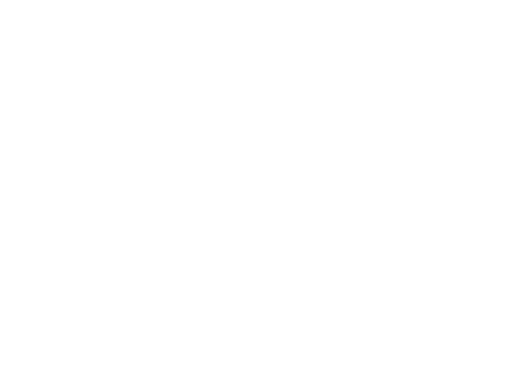

In [15]:
%matplotlib notebook
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Load the data from Excel
data = pd.read_excel("C:/Users/UCA/Documents/summers 2023/IWPR internship/building/Final Project/Ashgabat_data.xlsx")

# Create a figure and a 3D subplot
fig = plt.figure()
ax1 = fig.add_subplot(111, projection='3d')

# Set positions and dimensions for bars
xpos = np.arange(len(data))
ypos = data['No. of Buildings']
zpos = np.zeros(len(data))
dx = np.full(len(data), 0.8)  # Length of the bars (adjust this value to change the distance)
dy = np.full(len(data), 1000)  # Width of the bars
dz = data['No. of Floors']

# Define a color map and normalize the number of floors to map to colors
light_blue = (0, 93, 138)   # (R, G, B) for light blue
color = (light_blue[0] / 255, light_blue[1] / 255, light_blue[2] / 255)  # Normalize RGB values to be in the range [0, 1]


# Plot the 3D bar graph with varying intensity of blue along the height of each bar
for i, (x, y, z, h) in enumerate(zip(xpos, ypos, zpos, dz)):
    intensity = np.linspace(0.2, 1, h)  # Adjust intensity along the height of the bar
    for j in range(h):
        if j >= 5:  # Start using blue color after the 5th floor
            blue_intensity = intensity[j]
        else:
            blue_intensity = 0  # Keep the bottom part white
        bar_color = (
            (1 - blue_intensity) * color[0], 
            (1 - blue_intensity) * color[1], 
            (1 - blue_intensity) * color[2], 
            1.0  # Alpha value (fully opaque)
        )
        ax1.bar3d(x, y, z+j, dx[i], dy[i], 1, color=bar_color)

        
# Add a title to the figure
fig.suptitle('Ashgabat')

# Set labels for the axes
ax1.set_xlabel('Ashgabat')
ax1.set_ylabel('No. of Buildings')
ax1.set_zlabel('No. of Floors')

# Show the plot
plt.show()


<IPython.core.display.Javascript object>


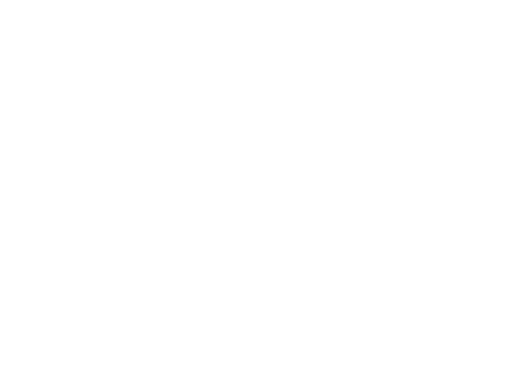

In [16]:
%matplotlib notebook
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Load the data from Excel
data = pd.read_excel("C:/Users/UCA/Documents/summers 2023/IWPR internship/building/Final Project/Ashgabat_data.xlsx")

# Create a figure and a 3D subplot
fig = plt.figure()
ax1 = fig.add_subplot(111, projection='3d')

# Set positions and dimensions for bars
xpos = np.arange(len(data))
ypos = data['No. of Buildings']
zpos = np.zeros(len(data))
dx = np.full(len(data), 0.8)  # Length of the bars (adjust this value to change the distance)
dy = np.full(len(data), 1000)  # Width of the bars
dz = data['No. of Floors']

# Define a color map and normalize the number of floors to map to colors
light_blue = (0, 93, 138)   # (R, G, B) for light blue
color = (light_blue[0] / 255, light_blue[1] / 255, light_blue[2] / 255)  # Normalize RGB values to be in the range [0, 1]


# Plot the 3D bar graph with varying intensity of blue along the height of each bar
for i, (x, y, z, h) in enumerate(zip(xpos, ypos, zpos, dz)):
    intensity = np.linspace(0.2, 1, h)  # Adjust intensity along the height of the bar
    for j in range(h):
        if j >= 5:  # Start using blue color after the 5th floor
            blue_intensity = intensity[j]
        else:
            blue_intensity = 0  # Keep the bottom part white
        bar_color = (
            (1 - blue_intensity) * color[0], 
            (1 - blue_intensity) * color[1], 
            (1 - blue_intensity) * color[2], 
            1.0  # Alpha value (fully opaque)
        )
        ax1.bar3d(x, y, z+j, dx[i], dy[i], 1, color=bar_color)

        
# Add a title to the figure
fig.suptitle('Ашхабад')

# Set labels for the axes
ax1.set_xlabel('Ашхабад')
ax1.set_ylabel('количество зданий')
ax1.set_zlabel('количество этажей')

# Show the plot
plt.show()


<IPython.core.display.Javascript object>


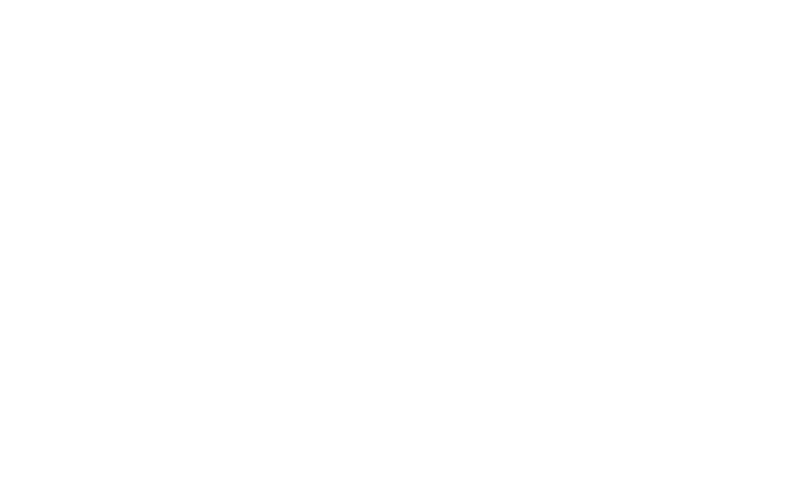

In [17]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D

# Load the data from Excel
data = pd.read_excel("C:/Users/UCA/Documents/summers 2023/IWPR internship/building/Final Project/Ashgabat_data.xlsx")

# Define a function to plot the 3D bar graph with varying intensity of blue along the height of each bar
def plot_3d_bar_graph(ax, xpos, ypos, zpos, dx, dy, dz, xlabel, ylabel, zlabel):
    light_blue = (0, 93, 138)   # (R, G, B) for light blue
    color = (light_blue[0] / 255, light_blue[1] / 255, light_blue[2] / 255)  # Normalize RGB values to be in the range [0, 1]

    for i, (x, y, z, h) in enumerate(zip(xpos, ypos, zpos, dz)):
        intensity = np.linspace(0.2, 1, h)  # Adjust intensity along the height of the bar
        for j in range(h):
            if j >= 5:  # Start using blue color after the 5th floor
                blue_intensity = intensity[j]
            else:
                blue_intensity = 0  # Keep the bottom part white
            bar_color = (
                (1 - blue_intensity) * color[0], 
                (1 - blue_intensity) * color[1], 
                (1 - blue_intensity) * color[2], 
                1.0  # Alpha value (fully opaque)
            )
            ax.bar3d(x, y, z+j, dx[i], dy[i], 1, color=bar_color)

    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_zlabel(zlabel)

# Create a figure and a 1x2 grid of subplots
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(10, 6), subplot_kw={'projection': '3d'})

# Set positions and dimensions for bars for the first graph (ax1)
xpos1 = np.arange(len(data))
ypos1 = data['No. of Buildings']
zpos1 = np.zeros(len(data))
dx1 = np.full(len(data), 0.8)
dy1 = np.full(len(data), 1000)
dz1 = data['No. of Floors']

# Plot the 3D bar graph for the first subplot with specific labels
plot_3d_bar_graph(ax1, xpos1, ypos1, zpos1, dx1, dy1, dz1, 'Ashgabat', 'No. of Buildings', 'No. of Floors')

# Set positions and dimensions for bars for the second graph (ax2)
xpos2 = np.arange(len(data))
ypos2 = data['No. of Buildings']
zpos2 = np.zeros(len(data))
dx2 = np.full(len(data), 0.8)
dy2 = np.full(len(data), 1000)
dz2 = data['No. of Floors']

# Plot the 3D bar graph for the second subplot with specific labels
plot_3d_bar_graph(ax2, xpos2, ypos2, zpos2, dx2, dy2, dz2, 'Ашхабад', 'количество зданий', 'количество этажей')

# Set title for each subplot
ax1.set_title('Ashgabat')
ax2.set_title('Ашхабад')

# Adjust subplot spacing
plt.subplots_adjust(wspace=0.5)

# Show the plot
plt.show()


In [18]:
!pip install voila


[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip
